# Ödev 1: Fonksiyonlara Özellik Eklemek.

In [740]:
import pandas as pd
import seaborn as sns

## Öncesi:

In [741]:
def cat_summary(dataframe, col_name, plot=False):

    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

## Sonrası:

In [742]:
def cat_summary(dataframe, col_name, corr_col=False, plot=False):

    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        f"{col_name}"+"_"+"Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()
        
    print("#######################################", end="\n\n")    
    
    if corr_col:
        print(pd.DataFrame({corr_col: dataframe[corr_col].value_counts(),
                    f"{corr_col}"+"_"+"Ratio": 100 * dataframe[corr_col].value_counts() / len(dataframe)}), end="\n\n")  
        if plot:
            sns.countplot(x=dataframe[corr_col], data=dataframe)
            plt.show()
        
        corr = dataframe[col_name].corr(dataframe[corr_col])
        print({f"{col_name}" + "_" + f"{corr_col}" + "_correlation": corr})


## Test:

In [743]:
pd.set_option('display.max_columns', None)

def load_titanic():
    df = pd.read_csv(r"C:/Users/eyp_d/Desktop/Bootcamp2/Datasets/titanic.csv")
    return df

In [744]:
df = load_titanic()

   Pclass  Pclass_Ratio
3     491     55.106622
1     216     24.242424
2     184     20.650954


NameError: name 'plt' is not defined

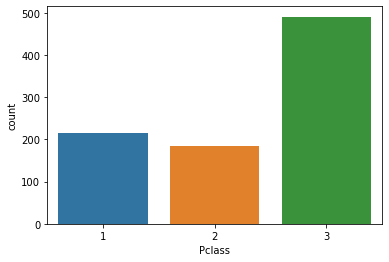

In [745]:
cat_summary(df, "Pclass", "Survived", plot=True)

# Ödev 2: Docstring. 

In [ ]:
def cat_summary(dataframe, col_name, plot=False):
    """
    
    Veri setinden, parametre olarak verilen herhangi bir kategorik değişkenin sayısal toplamını ve indekslerine göre
    oransal karşılığını veren fonksiyondur.
    
    
    Parameters
    ------
        dataframe: dataframe
                Değişken sayısal değerleri ve oransal karşılığının alınması istenilen dataframe
        col_name: str
                Sayısal ve oransal karşılığı alınmak istenilen dataframe değişkeni
        plot: boolean
                Değişkene ait fonksiyon çıktılarının grafiksel gösterimi için kullanılan boolean parametre
                
    
    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("titanic")  
        print(cat_summary(df, "Survived", plot=True))
        
        
        
    Notes
    ------
        col_name parametresi, dataframe'e ait bir kategorik değişken olmak zorundadır.

    
    """

    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

# Ödev 3:

In [746]:
import pandas as pd
import seaborn as sns
import numpy as np

## Görev 1:

### Soru 1: persona.csv dosyasını okutunuz ve veri seti ile ilgili genel bilgileri gösteriniz.

In [747]:
df = pd.read_csv(r"C:/Users/eyp_d/Desktop/Bootcamp2/Datasets/persona.csv")

In [748]:
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


### Soru 2: Kaç unique SOURCE vardır? Frekansları nedir?

In [749]:
df["SOURCE"].nunique()

2

In [750]:
pd.DataFrame(df["SOURCE"].value_counts())

,SOURCE
android,2974
ios,2026


### Soru 3: Kaç unique PRICE vardır?

In [751]:
df["PRICE"].nunique()

6

### Soru 4: Hangi PRICE'dan kaçar tane satış gerçekleşmiş?

In [752]:
pd.DataFrame(df["PRICE"].value_counts())

,PRICE
29,1305
39,1260
49,1031
19,992
59,212
9,200


### Soru 5: Hangi ülkeden kaçar tane satış olmuş?

In [753]:
pd.DataFrame(df["COUNTRY"].value_counts())

,COUNTRY
usa,2065
bra,1496
deu,455
tur,451
fra,303
can,230


### Soru 6: Ülkelere göre satışlardan toplam ne kadar kazanılmış?

In [754]:
pd.DataFrame(df.groupby(["COUNTRY"])["PRICE"].sum())

,PRICE
COUNTRY,
bra,51354
can,7730
deu,15485
fra,10177
tur,15689
usa,70225


### Soru 7: SOURCE türlerine göre satış sayıları nedir?

In [755]:
pd.DataFrame(df.groupby(["SOURCE"])["PRICE"].sum())

,PRICE
SOURCE,
android,101636
ios,69024


### Soru 8: Ülkelere göre PRICE ortalamaları nedir?

In [756]:
pd.DataFrame(df.groupby(["COUNTRY"])["PRICE"].mean())

,PRICE
COUNTRY,
bra,34.327540
can,33.608696
deu,34.032967
fra,33.587459
tur,34.787140
usa,34.007264


### Soru 9: SOURCE'lara göre PRICE ortalamaları nedir?

In [757]:
pd.DataFrame(df.groupby(["SOURCE"])["PRICE"].mean())

,PRICE
SOURCE,
android,34.174849
ios,34.069102


### Soru 10: COUNTRY-SOURCE kırılımında PRICE ortalamaları nedir?

In [758]:
pd.DataFrame(df.groupby(["COUNTRY", "SOURCE"])["PRICE"].mean())

PRICE
COUNTRY SOURCE            
bra     android  34.387029
        ios      34.222222
can     android  33.330709
        ios      33.951456
deu     android  33.869888
        ios      34.268817
fra     android  34.312500
        ios      32.776224
tur     android  36.229437
        ios      33.272727
usa     android  33.760357
        ios      34.371703

## Görev 2:

### COUNTRY, SOURCE, SEX, AGE kırılımında ortalama kazançlar nedir?

In [759]:
pd.DataFrame(df.groupby(["COUNTRY", "SOURCE", "SEX", "AGE"])["PRICE"].mean()).head(8)

PRICE
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897
                       20   31.000000
                       21   37.292683
                       22   34.945946

## Görev 3:

### Çıktıyı PRICE'a göre sıralayınız.

In [760]:
agg_df = pd.DataFrame(df.groupby(["COUNTRY", "SOURCE", "SEX", "AGE"])["PRICE"].mean()).sort_values("PRICE", ascending=False)
agg_df.head()

,,,,PRICE
COUNTRY,SOURCE,SEX,AGE,
bra,android,male,46,59.0
usa,android,male,36,59.0
fra,android,female,24,59.0
usa,ios,male,32,54.0
deu,android,female,36,49.0


## Görev 4:

### Index’te yer alan isimleri değişken ismine çeviriniz.

In [761]:
agg_df.reset_index(inplace=True)

In [762]:
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0


## Görev 5: 

### age değişkenini kategorik değişkene çeviriniz ve agg_df’e ekleyiniz.

In [763]:
agg_df["AGE_CAT"] = pd.cut(agg_df.AGE, bins=[0, 18, 23, 30, 40, 70], labels=['0_18','19_23','24_30','31_40', '41_70'])

In [764]:
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT
0,bra,android,male,46,59.0,41_70
1,usa,android,male,36,59.0,31_40
2,fra,android,female,24,59.0,24_30
3,usa,ios,male,32,54.0,31_40
4,deu,android,female,36,49.0,31_40


## Görev 6: 

### Yeni seviye tabanlı müşterileri (persona) tanımlayınız.

In [765]:
values_fancy = [str(row[0]).upper() +"_"+ str(row[1]).upper() +"_"+ str(row[2]).upper() +"_"+ str(row[5]) for row in agg_df.values]

customer_level_based = pd.DataFrame(np.array(values_fancy))

agg_df.insert(0, "customer_level_based", customer_level_based)


In [766]:
agg_df.head()

,customer_level_based,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT
0,BRA_ANDROID_MALE_41_70,bra,android,male,46,59.0,41_70
1,USA_ANDROID_MALE_31_40,usa,android,male,36,59.0,31_40
2,FRA_ANDROID_FEMALE_24_30,fra,android,female,24,59.0,24_30
3,USA_IOS_MALE_31_40,usa,ios,male,32,54.0,31_40
4,DEU_ANDROID_FEMALE_31_40,deu,android,female,36,49.0,31_40


In [767]:
agg_df.drop(["COUNTRY","SOURCE", "SEX", "AGE","AGE_CAT"], axis=1, inplace=True)  

In [768]:
agg_df.head(8)

,customer_level_based,PRICE
0,BRA_ANDROID_MALE_41_70,59.0
1,USA_ANDROID_MALE_31_40,59.0
2,FRA_ANDROID_FEMALE_24_30,59.0
3,USA_IOS_MALE_31_40,54.0
4,DEU_ANDROID_FEMALE_31_40,49.0
5,DEU_ANDROID_FEMALE_41_70,49.0
6,DEU_IOS_MALE_19_23,49.0
7,USA_ANDROID_FEMALE_41_70,49.0


#### Dikkat! List comprehension ile customers_level_based değerleri oluşturulduktan sonra bu değerlerin tekilleştirilmesi gerekmektedir

In [769]:
agg_df = agg_df.groupby("customer_level_based")["PRICE"].mean().reset_index()

In [770]:
agg_df.head(10)

,customer_level_based,PRICE
0,BRA_ANDROID_FEMALE_0_18,35.645303
1,BRA_ANDROID_FEMALE_19_23,34.077340
2,BRA_ANDROID_FEMALE_24_30,33.863946
3,BRA_ANDROID_FEMALE_31_40,34.898326
4,BRA_ANDROID_FEMALE_41_70,36.737179
5,BRA_ANDROID_MALE_0_18,34.805861
6,BRA_ANDROID_MALE_19_23,31.673243
7,BRA_ANDROID_MALE_24_30,33.413919
8,BRA_ANDROID_MALE_31_40,34.327381
9,BRA_ANDROID_MALE_41_70,40.041667


## Görev 7:

### Yeni müşterileri (personaları) segmentlere ayırınız.

In [771]:
agg_df["SEGMENT"] = pd.qcut(agg_df["PRICE"], 4, labels=["D", "C", "B", "A"]) # qcut, eşit parçada kategorize etmemizi sağladı

In [772]:
agg_df.head()

,customer_level_based,PRICE,SEGMENT
0,BRA_ANDROID_FEMALE_0_18,35.645303,B
1,BRA_ANDROID_FEMALE_19_23,34.077340,C
2,BRA_ANDROID_FEMALE_24_30,33.863946,C
3,BRA_ANDROID_FEMALE_31_40,34.898326,B
4,BRA_ANDROID_FEMALE_41_70,36.737179,A


#### Segmentleri betimleyiniz (Segmentlere göre group by yapıp price mean, max, sum’larını alınız).

In [773]:
pd.DataFrame(agg_df.groupby(["SEGMENT"])["PRICE"].mean().sort_values(ascending=False))

,PRICE
SEGMENT,
A,38.691234
B,34.999645
C,33.509674
D,29.206780


In [774]:
pd.DataFrame(agg_df.groupby(["SEGMENT"])["PRICE"].max().sort_values(ascending=False))

,PRICE
SEGMENT,
A,45.428571
B,36.000000
C,34.077340
D,32.333333


In [775]:
pd.DataFrame(agg_df.groupby(["SEGMENT"])["PRICE"].sum().sort_values(ascending=False))

,PRICE
SEGMENT,
A,1044.663328
B,944.990411
C,904.761209
D,817.789833


#### C segmentini analiz ediniz (Veri setinden sadece C segmentini çekip analiz ediniz).

In [776]:
C_fancy_index = agg_df[agg_df["SEGMENT"]=="C"].index.values
C_fancy_index

array([  1,   2,   7,  12,  17,  23,  35,  36,  44,  45,  46,  49,  53,
        55,  58,  60,  63,  64,  67,  70,  81,  83,  89,  90,  92, 101,
       104], dtype=int64)

In [777]:
C_df = agg_df.loc[C_fancy_index, ["PRICE", "SEGMENT"]].head()
C_df.head(20)

,PRICE,SEGMENT
1,34.077340,C
2,33.863946,C
7,33.413919,C
12,34.015873,C
17,33.864865,C


In [778]:
C_df.describe()

,PRICE
count,5.000000
mean,33.847189
std,0.259682
min,33.413919
25%,33.863946
50%,33.864865
75%,34.015873
max,34.077340


## Görev 8:

### Yeni gelen müşterileri segmentlerine göre sınıflandırınız ve ne kadar gelir getirebileceğini tahmin ediniz.

#### 33 yaşında ANDROID kullanan bir Türk kadını hangi segmente aittir veortalama ne kadar gelir kazandırması beklenir?

In [779]:
pd.DataFrame(agg_df.groupby(["customer_level_based"])["PRICE"].sum()).head(8)

,PRICE
customer_level_based,
BRA_ANDROID_FEMALE_0_18,35.645303
BRA_ANDROID_FEMALE_19_23,34.077340
BRA_ANDROID_FEMALE_24_30,33.863946
BRA_ANDROID_FEMALE_31_40,34.898326
BRA_ANDROID_FEMALE_41_70,36.737179
BRA_ANDROID_MALE_0_18,34.805861
BRA_ANDROID_MALE_19_23,31.673243
BRA_ANDROID_MALE_24_30,33.413919


In [780]:
new_user = "TUR_ANDROID_FEMALE_31_40"
agg_df[agg_df["customer_level_based"] == new_user]

,customer_level_based,PRICE,SEGMENT
72,TUR_ANDROID_FEMALE_31_40,41.833333,A


In [781]:
new_user2 = "FRA_IOS_FEMALE_31_40"
agg_df[agg_df["customer_level_based"] == new_user2]

,customer_level_based,PRICE,SEGMENT
63,FRA_IOS_FEMALE_31_40,32.818182,C
